In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
csv_path = './final_part_2_data.csv'
litter_df = pd.read_csv(csv_path)

In [12]:
# plotting variables
font_labels = {'family': 'Arial', 'color': 'black', 'size': 14}
font_titles = {'family': 'Arial', 'color': 'black', 'size': 16}
cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0, 1, len(litter_df)))  # one RGBA color per
# categorical variables for bar charts
species = litter_df['Tree species']
species_short = [i.split()[0] for i in species]
positions = np.arange(len(species))
bar_width = 0.25

In [5]:
# percent ratios
litter_df['C:N'] = litter_df['C'] / litter_df['N']
litter_df['C:P'] = litter_df['C'] / litter_df['P']
litter_df['N:P'] = litter_df['N'] / litter_df['P']

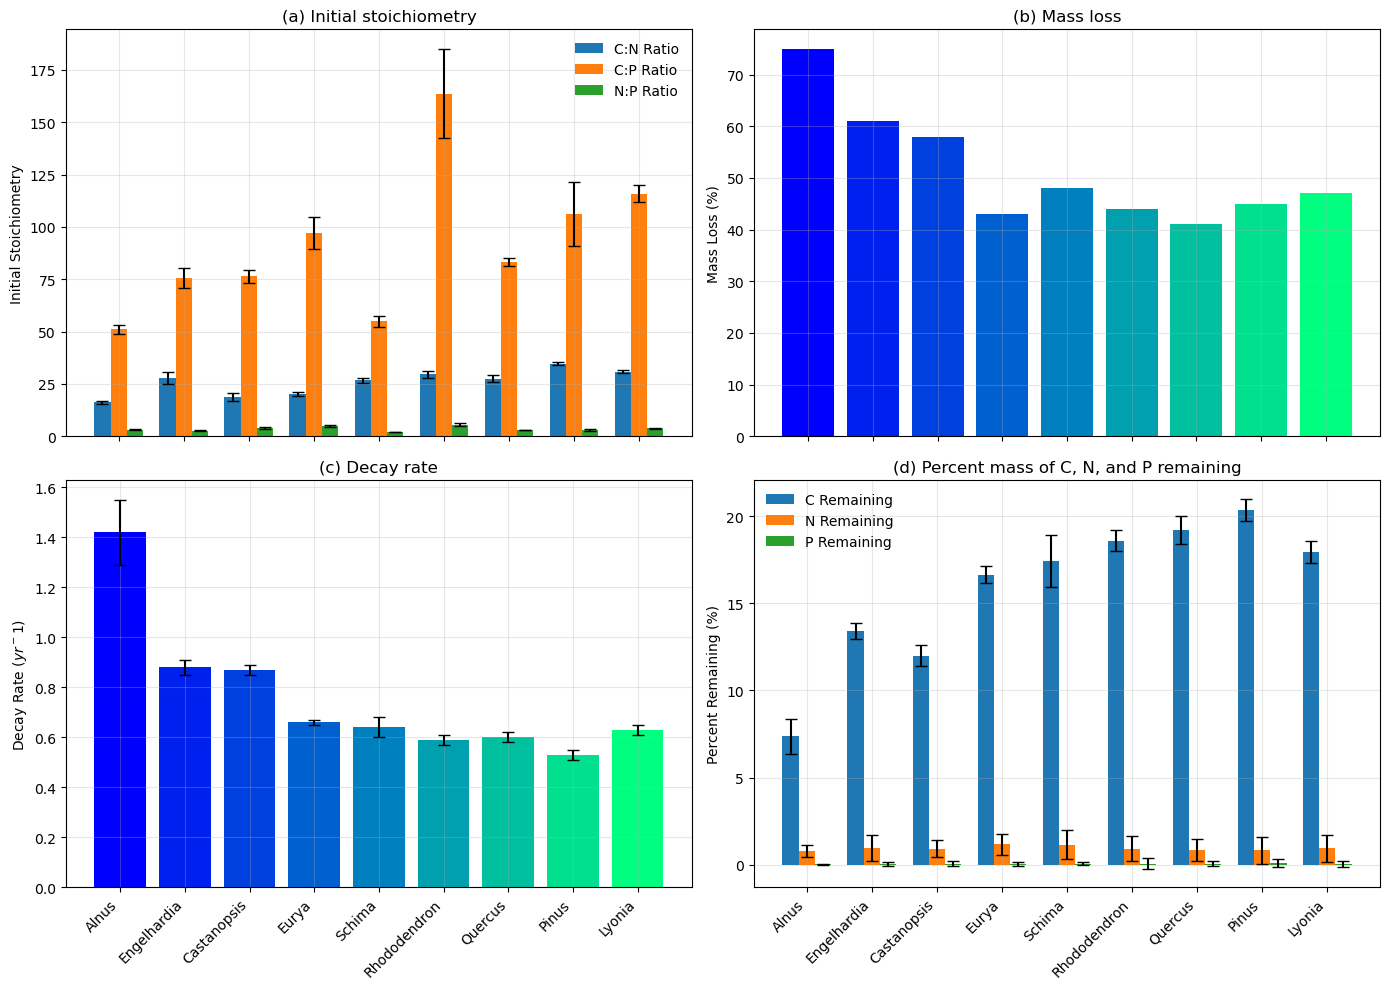

In [21]:
# ----------------------------------------------------
# Figure layout
# ----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
# ----------------------------------------------------
# Panel 1 — Initial Stoichiometry by tree species
# ----------------------------------------------------
CN_err = np.sqrt(((litter_df['C std. err'] / litter_df['C'])**2)+((litter_df['N std. Err'] / litter_df['N'])**2))
CP_err = np.sqrt(((litter_df['C std. err'] / litter_df['C'])**2)+((litter_df['P std. Err'] / litter_df['P'])**2))
NP_err = np.sqrt(((litter_df['N std. Err'] / litter_df['N'])**2)+((litter_df['P std. Err'] / litter_df['P'])**2))

ax1.bar(positions - bar_width, litter_df["C:N"], width=bar_width, yerr=litter_df["C:N"]*CN_err, capsize=4, label='C:N Ratio') 
ax1.bar(positions, litter_df["C:P"], width=bar_width, yerr=litter_df["C:P"]*CP_err, capsize=4, label='C:P Ratio')
ax1.bar(positions + bar_width, litter_df["N:P"], width=bar_width, yerr=litter_df["N:P"]*NP_err, capsize=4, label='N:P Ratio')

ax1.set_xticks(positions)
ax1.tick_params(axis='x', labelbottom=False)
ax1.set_ylabel('Initial Stoichiometry')
ax1.set_title('(a) Initial stoichiometry')
ax1.legend(frameon=False)
# ----------------------------------------------------
# Panel 2 — Litter Mass loss by Tree species
# ----------------------------------------------------
ax2.bar(litter_df["Tree species"], litter_df["Litter Mass Loss"], color=colors)
ax2.set_xticks(positions)
ax2.tick_params(axis='x', labelbottom=False)
ax2.set_ylabel("Mass Loss (%)")
ax2.set_title("(b) Mass loss")
# ----------------------------------------------------
# Panel 3 — Decay Rate by Tree Species
# ----------------------------------------------------
ax3.bar(litter_df["Tree species"], litter_df["K"], yerr=litter_df['K std. Err'], capsize=4, color=colors)
ax3.set_xticks(positions)
ax3.set_xticklabels(species_short, rotation=45, ha='right')
ax3.set_ylabel("Decay Rate ${(yr^-1)}$")
ax3.set_title("(c) Decay rate")
# ----------------------------------------------------
# Panel 4 — Final Nutrient Percentages Remaining by tree species
# ----------------------------------------------------
c_vals = (1 - (litter_df['C Release'] / 100)) * litter_df['C']
n_vals = (1 - (litter_df['N Release'] / 100)) * litter_df['N']
p_vals = (1 - (litter_df['P Release'] / 100)) * litter_df['P']

C_err = np.sqrt(((1 - (litter_df['C Release'] / 100))**2)+(((litter_df['C rel std. err'] * litter_df['C'])/100)**2))
N_err = np.sqrt(((1 - (litter_df['N Release'] / 100))**2)+(((litter_df['N rel std. err'] * litter_df['N'])/100)**2))
P_err = np.sqrt(((1 - (litter_df['P Release'] / 100))**2)+(((litter_df['P rel std. err'] * litter_df['P'])/100)**2))

ax4.bar(positions - bar_width, c_vals, width=bar_width, yerr=C_err, capsize=4, label='C Remaining')
ax4.bar(positions, n_vals, width=bar_width, yerr=N_err, capsize=4, label='N Remaining')
ax4.bar(positions + bar_width, p_vals, width=bar_width, yerr=P_err, capsize=4, label='P Remaining')

ax4.set_xticks(positions)
ax4.set_xticklabels(species_short, rotation=45, ha='right')
ax4.set_ylabel('Percent Remaining (%)')
ax4.set_title('(d) Percent mass of C, N, and P remaining')
ax4.legend(frameon=False)
# ----------------------------------------------------
# Styling and tight layout
# ----------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

Figure 1. (a) The initial nutrient ratios at the start of the decomposition experiment. (b) Percentage of total mass lost over one year. (c) The annual decay rate of each tree species used in the experiment. (d) The percentage of the C, N, and P remaining after one year. Tree species are listed in order of increasing elevation from left to right, also denoted by the color gradient in b and c. Variability in decomposition occurs along an elevation gradient.      